## Importing the Libraries

This imports pandas, numpy, matplotlib.pyplot, and seaborn so that they can be used to manipulate and analyze the data from the csv file.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

`dataset` is created here by using pandas to read the csv file and pull all the data into a single place.

In [48]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/Assignment4_MEH/Live.csv")

## Exploring the Dataset

`dataset.head()` allows the user to see the first 5 rows of the dataset. `dataset.info()` allows the user to see the total number of entries, the datatypes of each column, how many entries are null / not null, and each column in the dataset. A new instance of `dataset` is created, `dataset_new`, where four columns were dropped since they were not useful toward the dataset. `dataset_new.info()` was used once again to show that the columns were dropped.

In [49]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [51]:
dataset_new = dataset.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis = 1)
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


## Creating the 'X' Variable

The `x` variable is created using the `num_reactions` and `num_likes` columns from the original dataset. This allows the new `x` variable to have only these 2 columns so they can be easily graphed and a k can be found.

In [52]:
x = dataset_new[['num_reactions', 'num_likes']]

## Elbow Visualizer

The elbow visualizer is called from sklearn and is given the parameters `km`, an instance of `KMeans()` along the range 2 to 10. It is fit with the newly created `x` that has two columns and the elbow at k is found to be 4. By finding the k, we can use this value to accurately group our clusters to find the highest score.

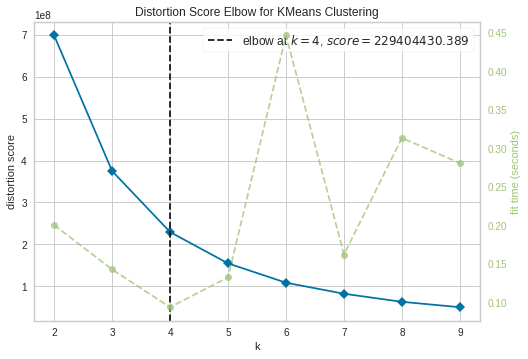

In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state = 0)
visualizer = KElbowVisualizer(km, k = (2,10))
visualizer.fit(x)
visualizer.show()
plt.show()

## Silhouette Coefficient

The silhouette coefficient is an added parameter to the previous elbow visualizer and its parameters. It is once again fit with `x` and the elbow at k is found to be 2, which differs from the previous findings. This can also be used to see if k = 4 or k = 2 will give the highest accuracy score for this model.

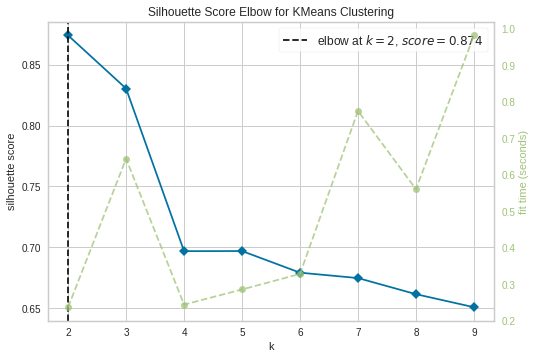

In [54]:
km = KMeans(random_state = 0)
visualizer_sil = KElbowVisualizer(km, k = (2,10), metric = 'silhouette')
visualizer_sil.fit(x)
visualizer_sil.show()
plt.show()

## Model Build

The model is built here with `y_pred` being created so that it can predict the future clusters in the model. k = 2 gave the highest and most consistent accuracy. A new column was added to `dataset_new` to group the clusters into two groups: 0 and 1. The cluster centers were also found so that they could be plotted on the graph.

In [55]:
km = KMeans(n_clusters = 2, random_state = 0)
y_pred = km.fit_predict(x)

In [56]:
dataset_new['Cluster'] = y_pred
dataset_new.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0


In [57]:
km.cluster_centers_

array([[ 118.79188282,  107.41486115],
       [1701.13709677, 1637.21169355]])

## Cluster Visualization

This uses the seaborn library and creates a scatterplot with `num_reactions` as the x axis and `num_likes` as the y axis. This makes it easier to visualize the data to actually see the two clusters and where the center is.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


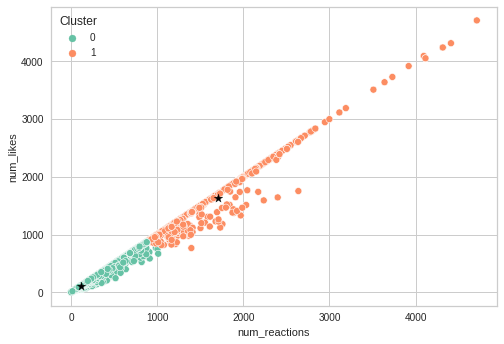

In [58]:
sns.scatterplot('num_reactions', 'num_likes', data = x, hue = dataset_new['Cluster'], palette = 'Set2', legend = 'full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '*', s = 80, color = 'black')
plt.show()

## DBScan

A new instance of DBScan is created as the variable `cluster` with an eps of 50 and a minimum sample, or groups, of 2. The eps is the distance between various points that links them into being in the same group. For this model, there are 19 clusters that will be graphed, ranging from -1 to 17. Seaborn is used once again to visualize the clusters and to see how accurate DBScan is for this dataset.

In [59]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps = 50, min_samples = 2).fit(x)
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
set(cluster.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


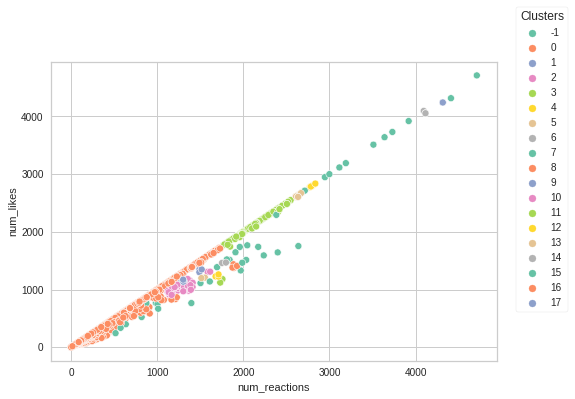

In [61]:
p = sns.scatterplot('num_reactions', 'num_likes', data = x, hue = cluster.labels_, palette = 'Set2', legend = 'full')
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.2), title = "Clusters")
plt.show()

## Conclusion: The Silhouette Coefficient (k = 2) gave the best clustering results for this model.